In [1]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
SEED = 42

In [2]:
df=pd.read_csv('preprocessed_datset.csv')  
df.head()

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
0,0,14,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,1,0
1,0,8,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1,0
2,0,16,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,1,0
3,0,15,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,1,0
4,0,15,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,1,0


In [15]:
X = df.drop('status', axis=1)   # axis=0 for row, axis=1 for column
y = df['status']

# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)


X_train (4166, 11)
y_train (4166,)
X_test (1042, 11)
y_test (1042,)


In [16]:
def evaluate(model, X_test , y_test,modelname):
  y_pred1=model.predict(X_test)
  #precision    = precision_score(y_test, y_pred1)
 # recall       = recall_score(y_test, y_pred1)
 # f1score      = f1_score(y_test, y_pred1) 
 # rocauc       = roc_auc_score(y_test, y_pred1)
  #logloss      = log_loss(y_test, y_pred1)
  accuracy     = accuracy_score(y_test, y_pred1)
  classification=classification_report(y_test,y_pred1)
  confusion    = confusion_matrix(y_test, y_pred1)
  df_model = pd.DataFrame({  'model'        : [modelname],
                             'accuracy'     : [accuracy],
                            'classification':[classification],
                             #'precision'    : [precision],
                             #'recall'       : [recall],
                             #'f1score'      : [f1score],
                             #'rocauc'       : [rocauc],
                            # 'logloss'      : [logloss],
                             'timetaken'    : [time2],
                            'confusionmatrix' : [confusion]
                            
                                }) 
  return df_model

In [17]:
%%time
time2=time.time()
print("base model")
base_model = RandomForestClassifier(random_state=0)
base_model.fit(X_train, y_train)
#base_accuracy = evaluate(base_model, X_test, y_test,modelname)
model1 = evaluate(base_model,  X_test,  y_test, 'RandomForest')
model1.timetaken[0] = time.time() - time2
print("Random Forest")
print(base_model.get_params())

model1

base model
Random Forest
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Wall time: 1.23 s


,model,accuracy,classification,timetaken,confusionmatrix
0,RandomForest,0.790787,precision recall f1-score ...,1.226905,"[[468, 0, 0, 94], [2, 0, 0, 0], [4, 0, 1, 0], ..."


In [18]:
%%time
from sklearn.ensemble import ExtraTreesClassifier

time2=time.time()
print("base model")
base_model1 = ExtraTreesClassifier(random_state=0)
base_model1.fit(X_train, y_train)
model2 = evaluate(base_model1,  X_test,  y_test, 'Extra Tree')
model2.timetaken[0] = time.time() - time2
print("Extra Tree")
print(base_model1.get_params())

base model
Extra Tree
{'bootstrap': False, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Wall time: 896 ms


In [19]:
%%time
time2=time.time()
print("base model")
base_model2 = LogisticRegression(random_state=0)
base_model2.fit(X_train, y_train)
model3 = evaluate(base_model2,  X_test,  y_test, 'Logistic Regression')
model3.timetaken[0] = time.time() - time2
print("Logoistic Regression")
print(base_model2.get_params())

base model
Logoistic Regression
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Wall time: 307 ms


In [20]:
%%time
time2=time.time()
print("base model")
base_model3 = KNeighborsClassifier()
base_model3.fit(X_train, y_train)
model4 = evaluate(base_model3,  X_test,  y_test, 'KNN')
model4.timetaken[0] = time.time() - time2
print("KNN")
print(base_model3.get_params())
(model4)

base model
KNN
{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
Wall time: 118 ms


,model,accuracy,classification,timetaken,confusionmatrix
0,KNN,0.74952,precision recall f1-score ...,0.117558,"[[434, 0, 0, 128], [2, 0, 0, 0], [4, 0, 0, 1],..."


In [21]:
%%time
time2=time.time()
print("base model")
base_model4 = LinearSVC(random_state=0)
base_model4.fit(X_train, y_train)
model5 = evaluate(base_model4,  X_test,  y_test, 'LinearSVC')
model5.timetaken[0] = time.time() - time2
print("LinearSVC")
print(base_model4.get_params())

base model
LinearSVC
{'C': 1.0, 'class_weight': None, 'dual': True, 'fit_intercept': True, 'intercept_scaling': 1, 'loss': 'squared_hinge', 'max_iter': 1000, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 0, 'tol': 0.0001, 'verbose': 0}
Wall time: 1.23 s


In [22]:
%%time
time2=time.time()
print("base model")
base_model5 = GaussianNB()
base_model5.fit(X_train, y_train)
model6 = evaluate(base_model5,  X_test,  y_test, 'GaussianNB')
model6.timetaken[0] = time.time() - time2
print("GaussianNB")
print(base_model5.get_params())

base model
GaussianNB
{'priors': None, 'var_smoothing': 1e-09}
Wall time: 21.4 ms


In [23]:
%%time
time2=time.time()
print("base model")
base_model6=SVC(random_state=0)
base_model6.fit(X_train, y_train)
model7 = evaluate(base_model6,  X_test,  y_test, 'SVC')
model7.timetaken[0] = time.time() - time2
print("SVC")
print(base_model6.get_params())

base model
SVC
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}
Wall time: 1.43 s


In [24]:
%%time
time2=time.time()
print("base model")
base_model7=DecisionTreeClassifier(random_state=0)
base_model7.fit(X_train, y_train)
model8 = evaluate(base_model7,  X_test,  y_test, 'Decision Tree')
model8.timetaken[0] = time.time() - time2
print("Decision Tree")
print(base_model7.get_params())


base model
Decision Tree
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 0, 'splitter': 'best'}
Wall time: 53.7 ms


In [25]:
df_base= pd.concat([model1,model2,model3,model4,model5,model6,model7,model8],axis = 0).reset_index()
df_base.drop('index', axis=1, inplace=True)
df_base

,model,accuracy,classification,timetaken,confusionmatrix
0,RandomForest,0.790787,precision recall f1-score ...,1.226905,"[[468, 0, 0, 94], [2, 0, 0, 0], [4, 0, 1, 0], ..."
1,Extra Tree,0.784069,precision recall f1-score ...,0.895779,"[[470, 0, 0, 92], [2, 0, 0, 0], [4, 0, 1, 0], ..."
2,Logistic Regression,0.757198,precision recall f1-score ...,0.306503,"[[451, 0, 0, 111], [2, 0, 0, 0], [4, 0, 0, 1],..."
3,KNN,0.749520,precision recall f1-score ...,0.117558,"[[434, 0, 0, 128], [2, 0, 0, 0], [4, 0, 0, 1],..."
4,LinearSVC,0.612284,precision recall f1-score ...,1.229683,"[[172, 0, 0, 390], [2, 0, 0, 0], [2, 0, 0, 3],..."
5,GaussianNB,0.747601,precision recall f1-score ...,0.021418,"[[427, 0, 0, 135], [2, 0, 0, 0], [5, 0, 0, 0],..."
6,SVC,0.759117,precision recall f1-score ...,1.429013,"[[447, 0, 0, 115], [2, 0, 0, 0], [5, 0, 0, 0],..."
7,Decision Tree,0.730326,precision recall f1-score ...,0.053718,"[[428, 6, 2, 126], [1, 0, 0, 1], [4, 0, 1, 0],..."


In [26]:
df_base['confusionmatrix']
df_base.to_csv("D:\MAJOR PROJECT\datasets\imbalanced_data_performance_metrics.csv")

In [27]:
# libraries 
#!pip install yellowbrick
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

#Visualizers
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ROCAUC
from yellowbrick.classifier import PrecisionRecallCurve
import matplotlib.pyplot as plt

#Metrics
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
#Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [28]:
classes = ["Normal", "Mild","Moderate","Severe"]
classes

['Normal', 'Mild', 'Moderate', 'Severe']

In [29]:
classifiers=[
DecisionTreeClassifier(random_state=0),
SVC(random_state=0),
LinearSVC(random_state=0),
GaussianNB(),
KNeighborsClassifier(),
LogisticRegression(random_state=0),
RandomForestClassifier(random_state=0),
ExtraTreesClassifier(random_state=0)]


In [30]:
#Write function for class-centric metrics
# Classification report
def CR_viz():
    def Class_report(model,classes):
        visualizer = ClassificationReport(model, classes=classes, support=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data
        return visualizer.poof()
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        Class_report(name,classes)

#Class Prediction Error
def CPE_viz():    
    def CPE(model,classes):
        visualizer = ClassPredictionError(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data 
        visualizer.score(X_test, y_test)
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CPE(name,classes)
        
#Confusion matrix
def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes,percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test,  x_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)
        
#ROC-AUC
def ROC_viz():    
    def ROC(model,classes):
        visualizer = ROCAUC(model, classes=classes)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        ROC(name,classes)

#Precision Recall Curve
def PRC_viz():  
    def PRC(model,classes):
        visualizer = PrecisionRecallCurve(model,classes=classes, per_class=True, iso_f1_curves=False,
    fill_area=False, micro=False)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        #x_test=visualizer.predict(X_test)
        visualizer.score(X_test, y_test)
        #visualizer.score(y_test, x_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        PRC(name,classes)


In [31]:
# Write function for aggregate metrics
def classifier_metrics():    
    def metrics(model):
        #     model=model_name()
        model.fit(X_train, y_train)  # Fit the visualizer and the model
        y_pred = model.predict(X_test)
        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('cohen_kappa_score: {0:.3f}'.format(c_k_s))
        print('log_loss: {0:.3f}'.format(log_metric))
        print('zero_one_loss: {0:.3f}'.format(zero_met))
        print('hemming_loss: {0:.3f}'.format(hl))
        print('matthews_corrcoef: {0:.3f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()
        print ("------------------------------------------------------")

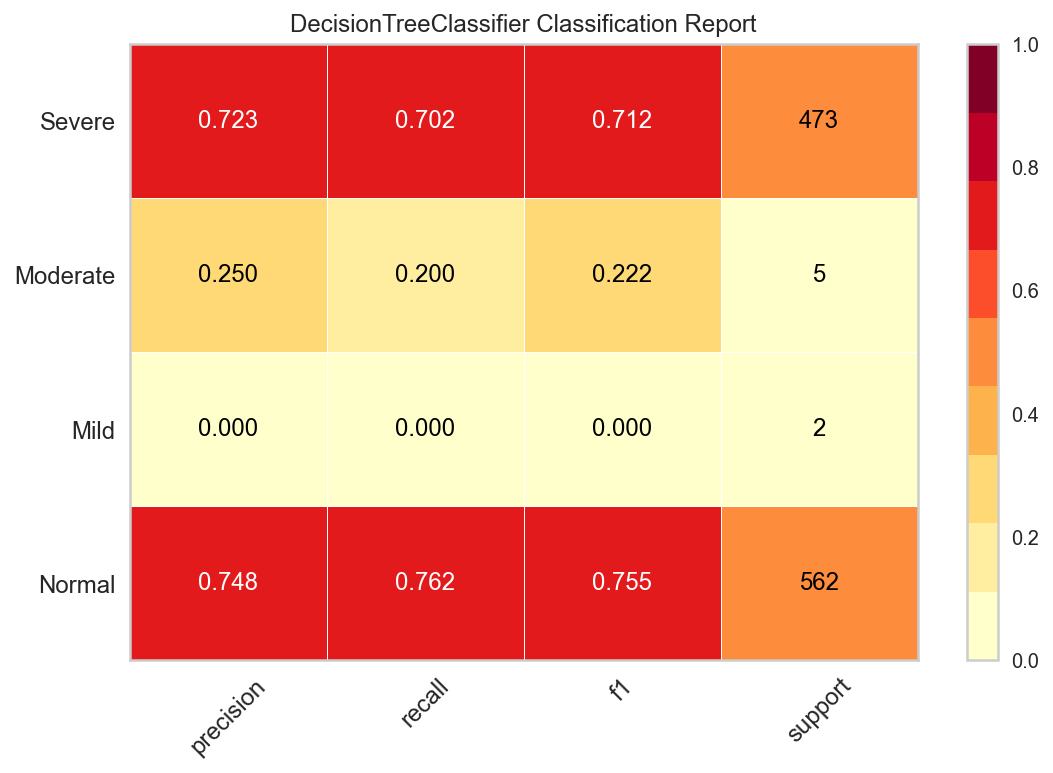

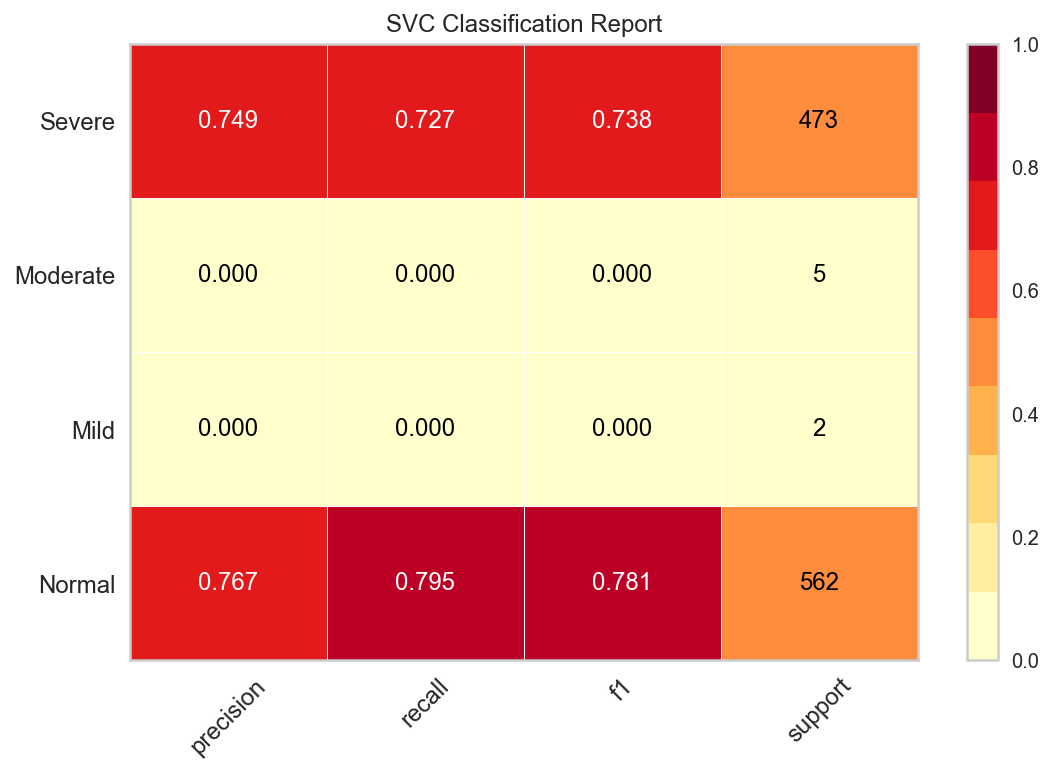

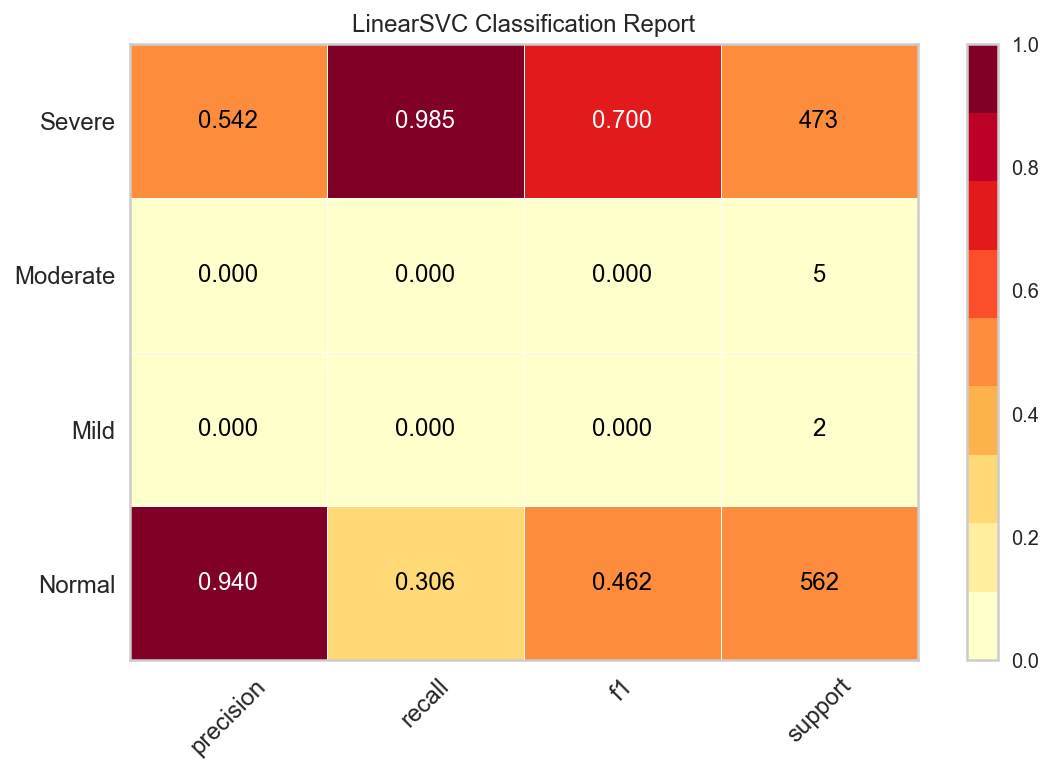

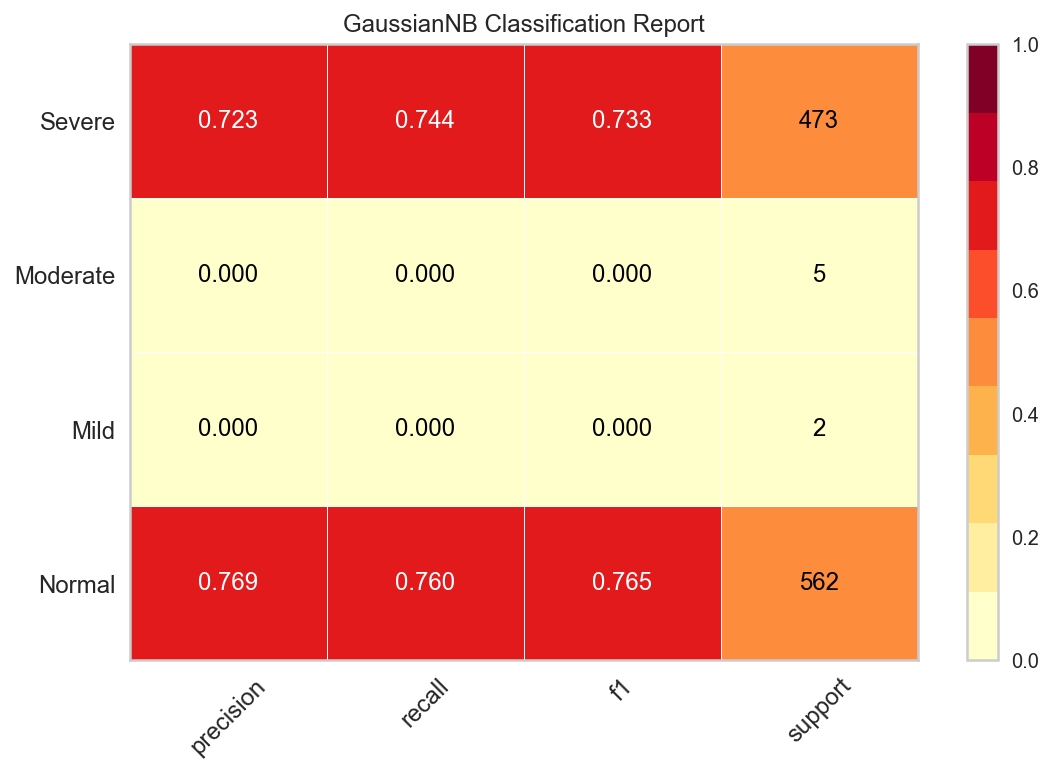

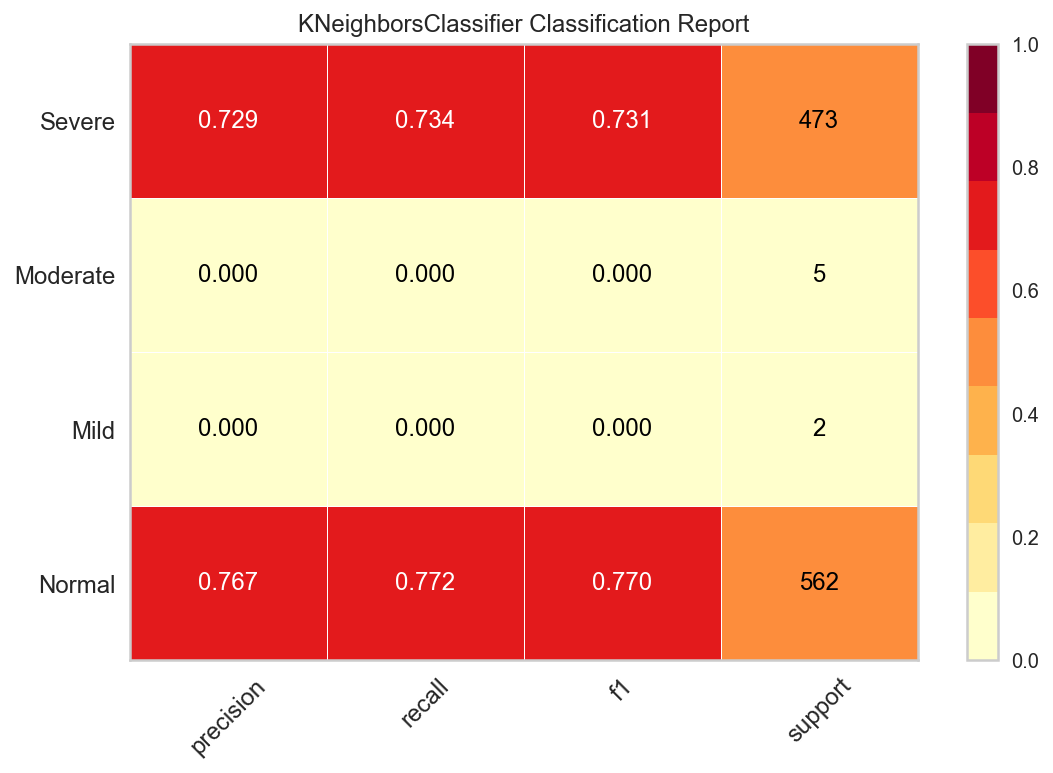

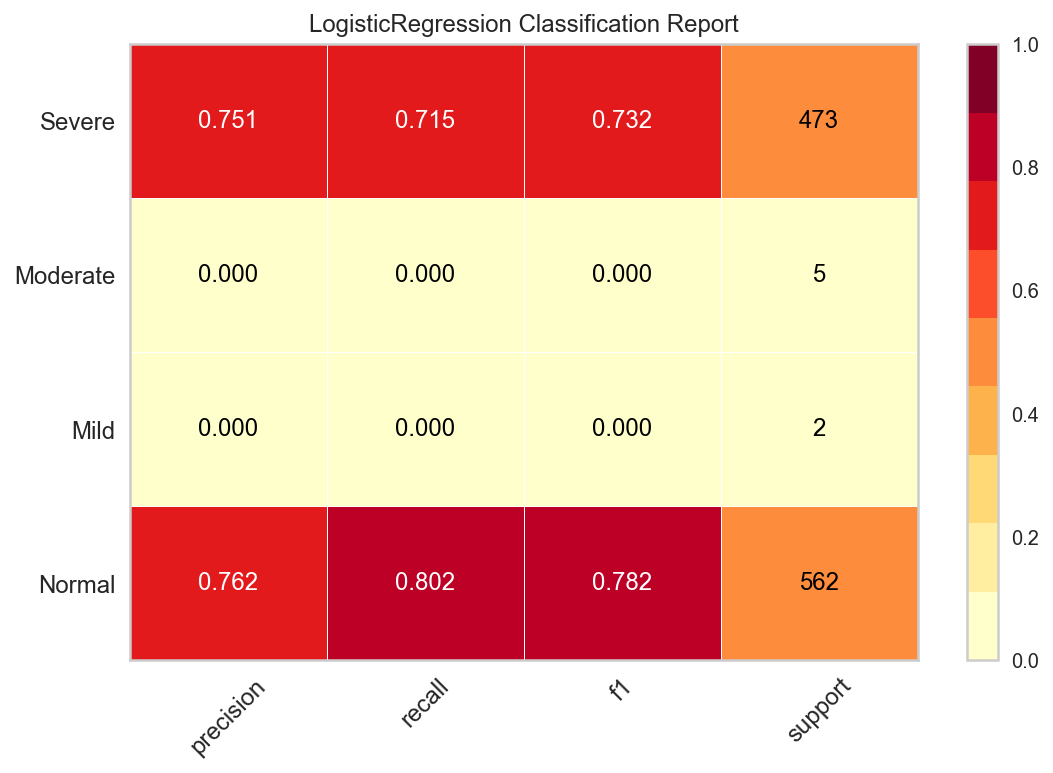

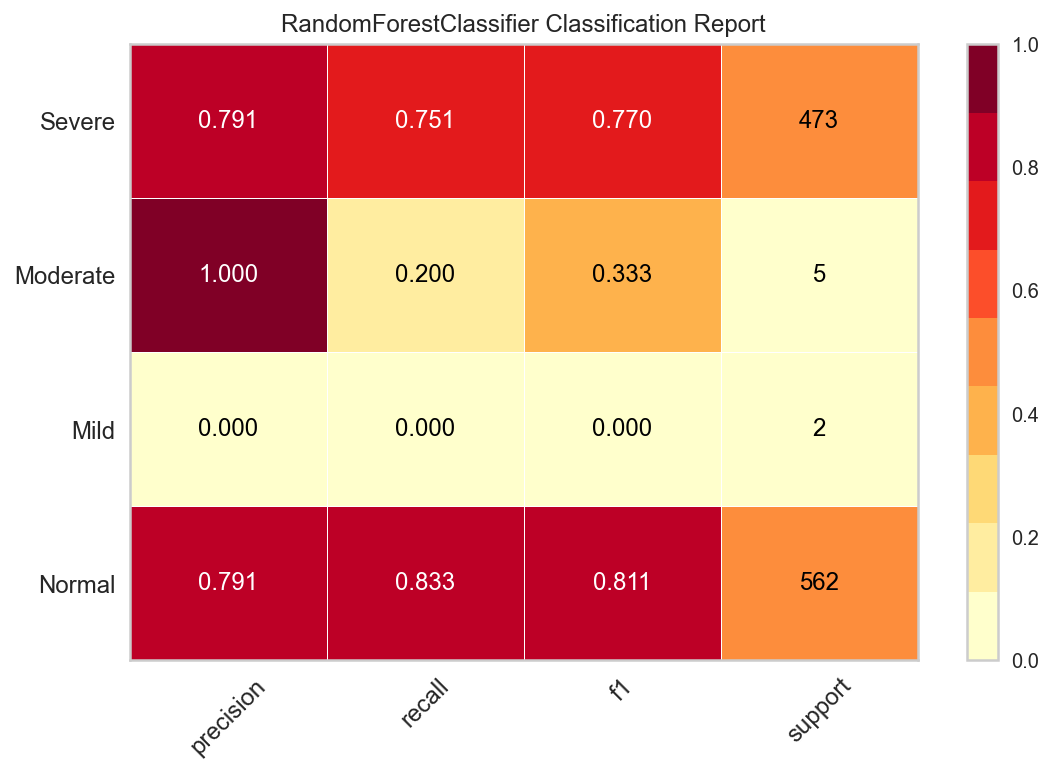

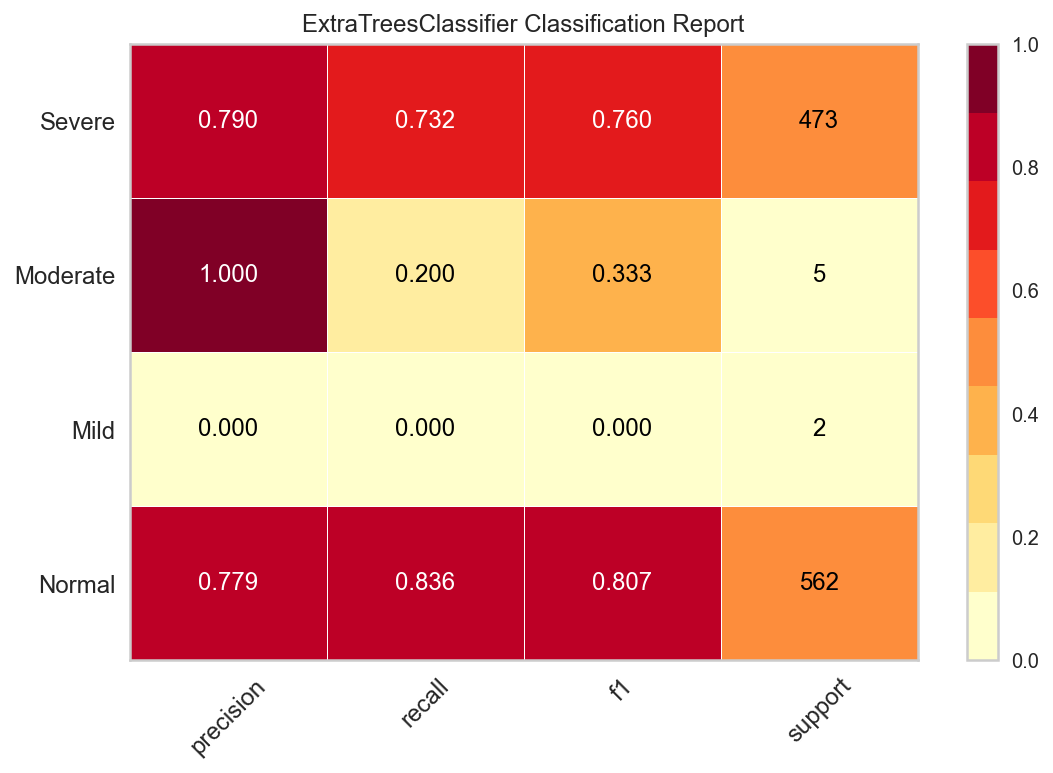

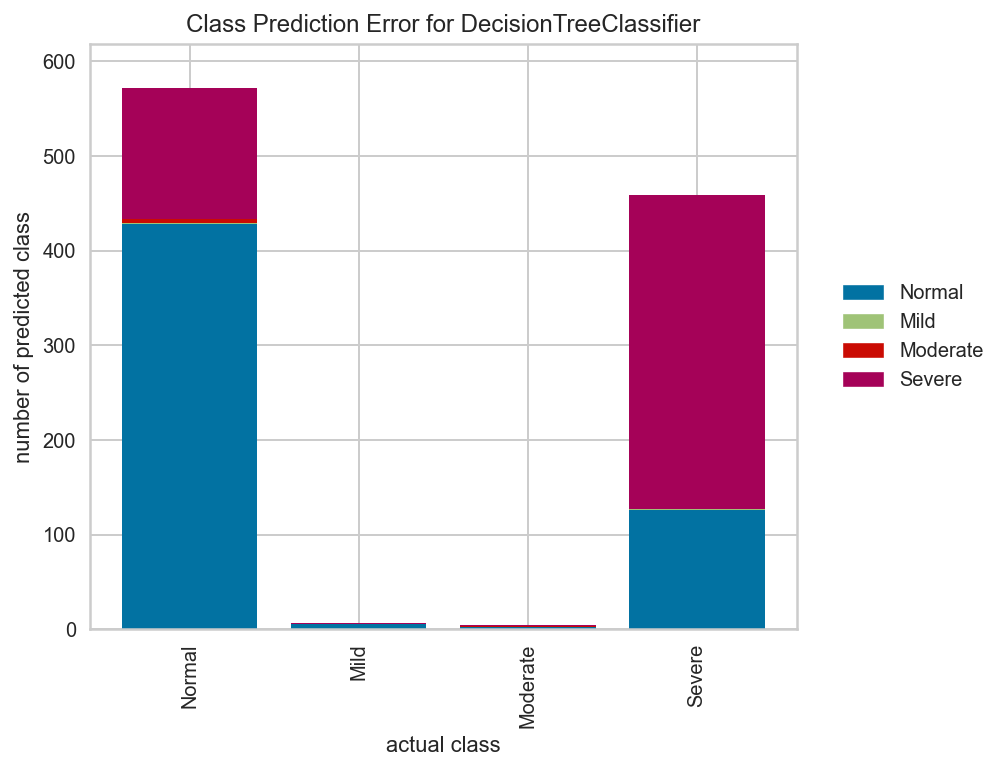

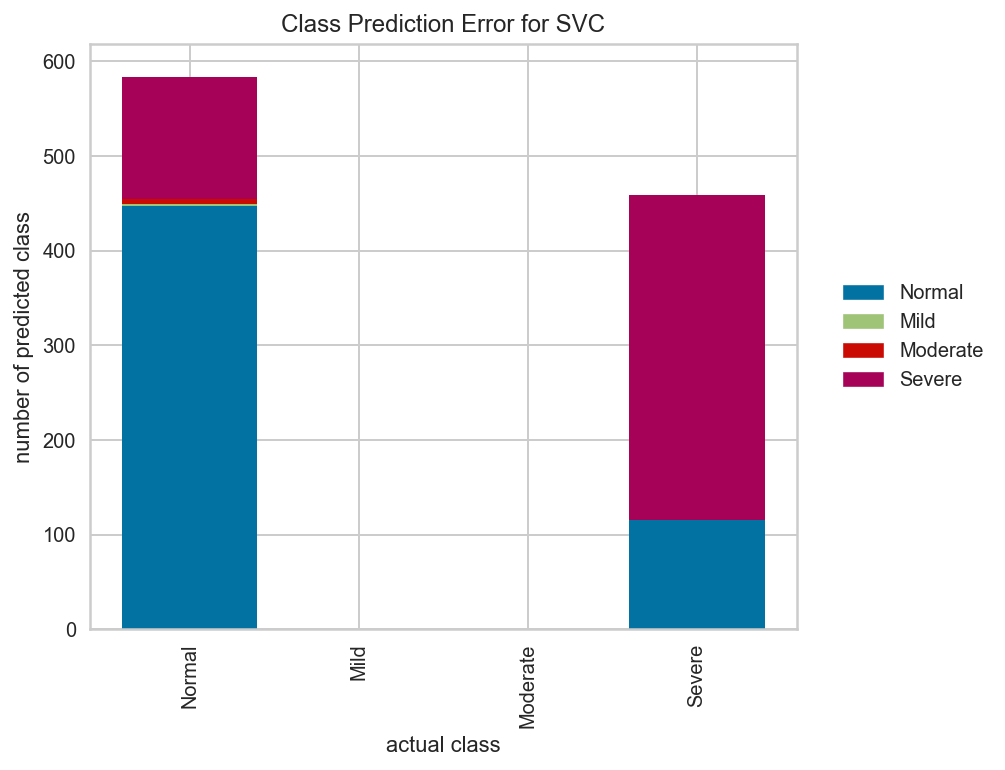

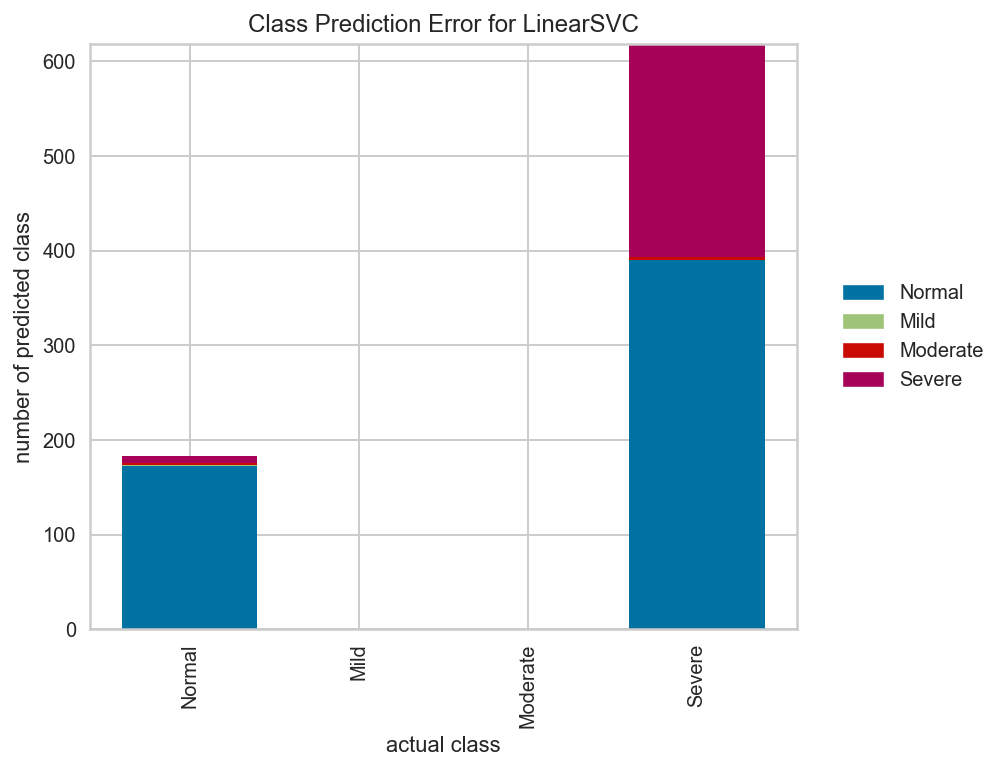

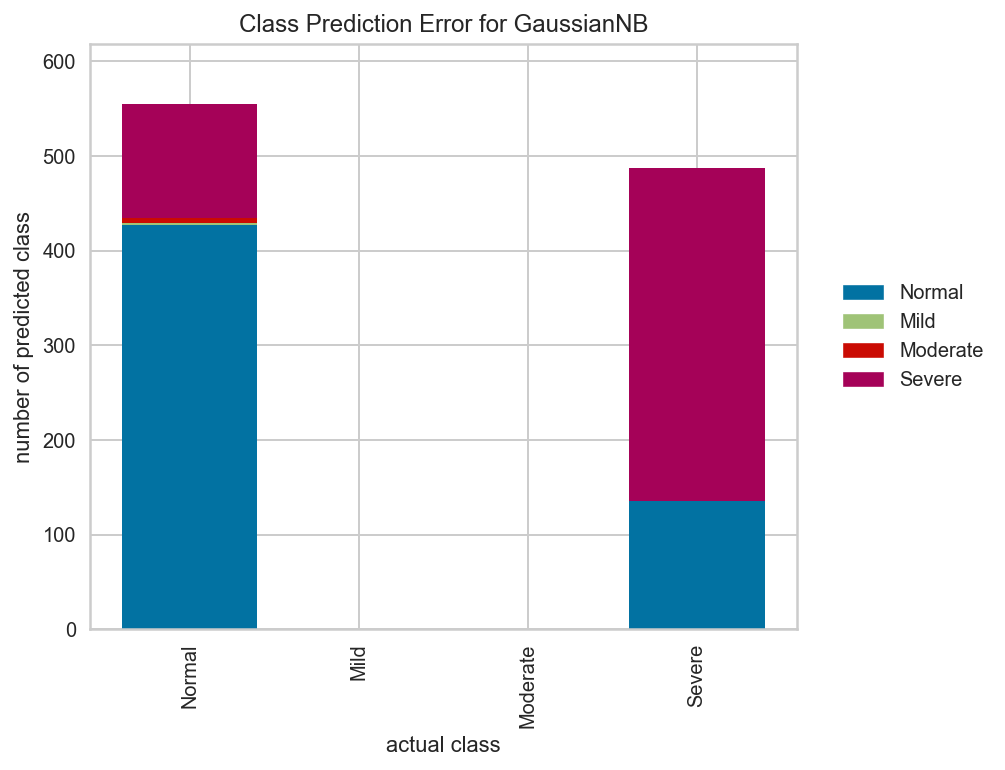

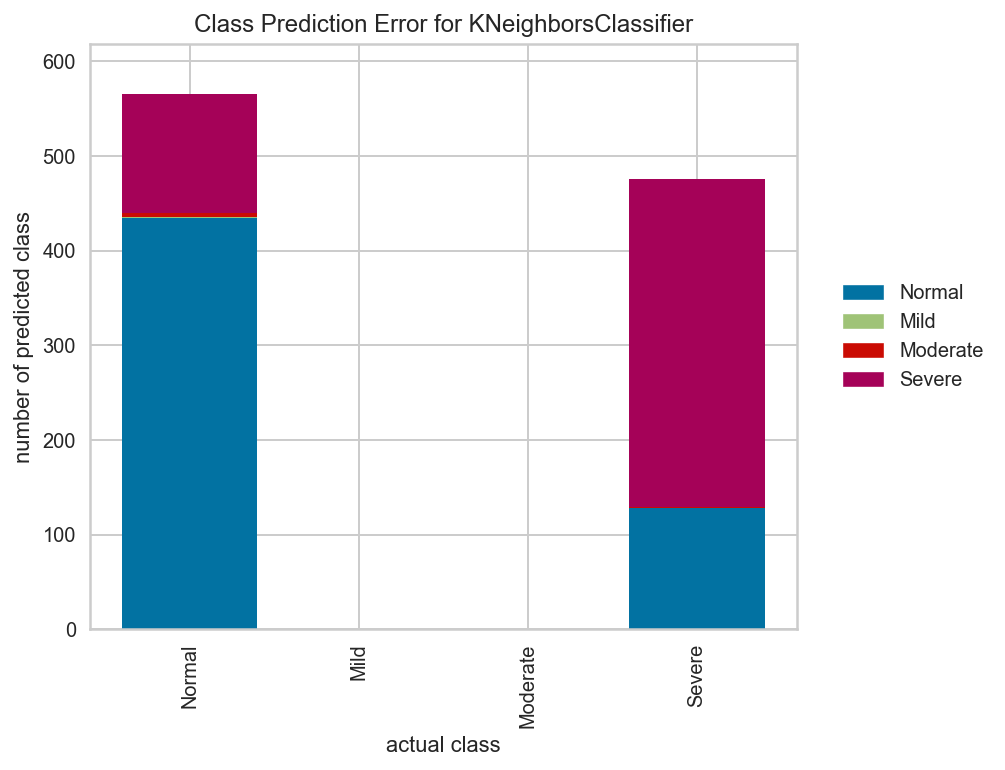

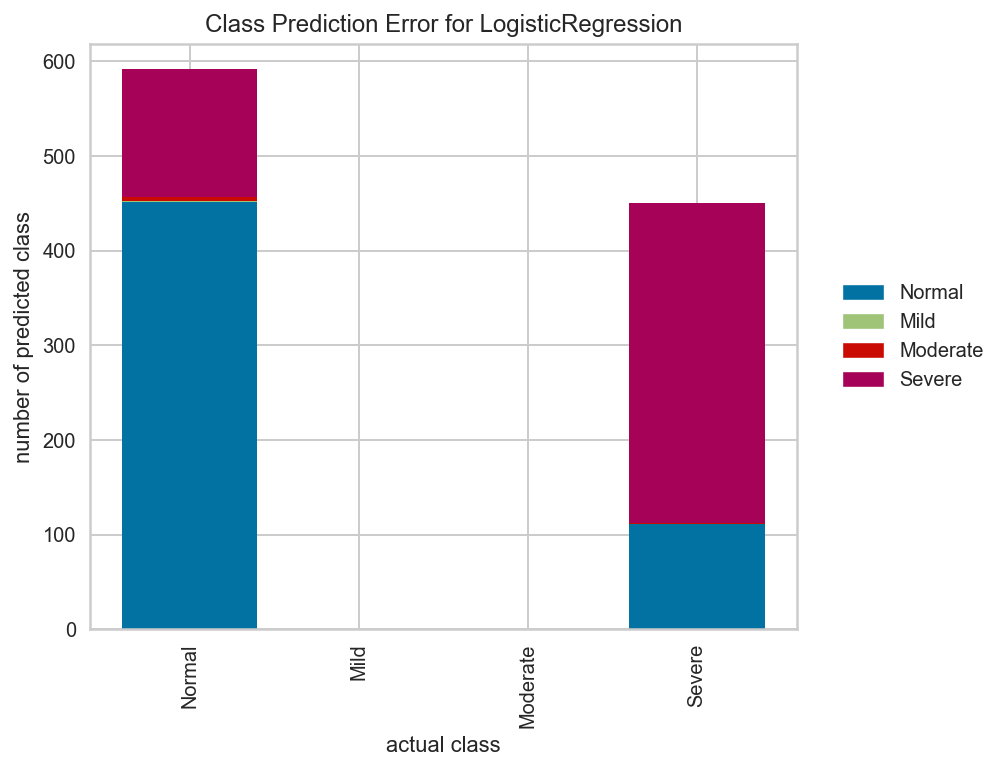

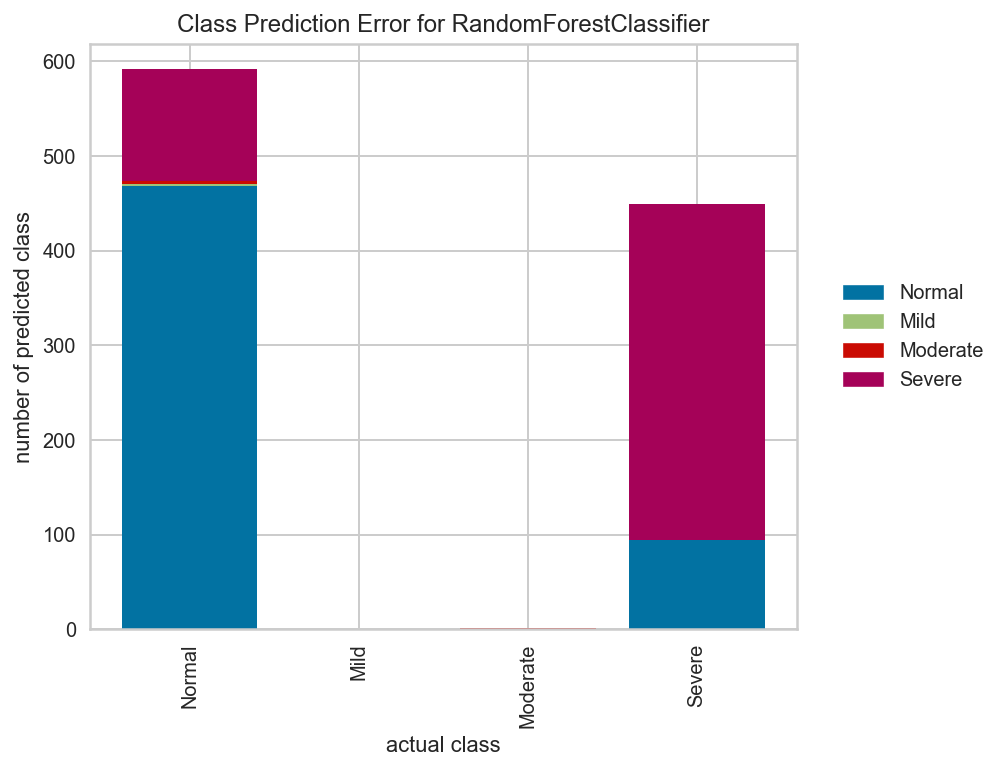

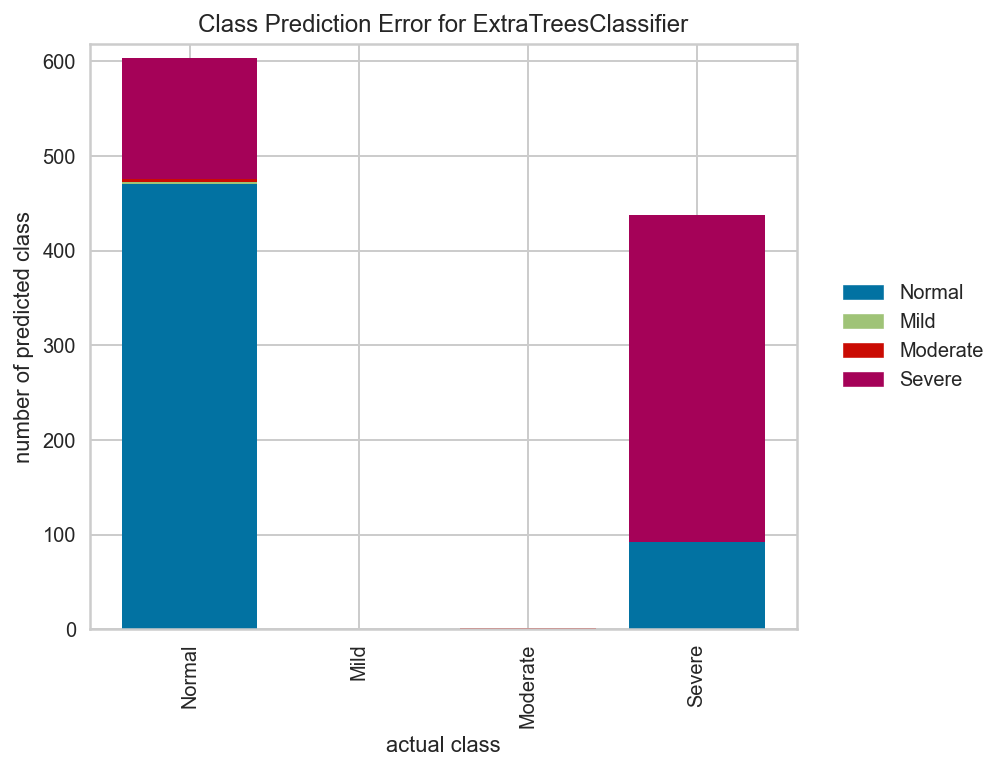

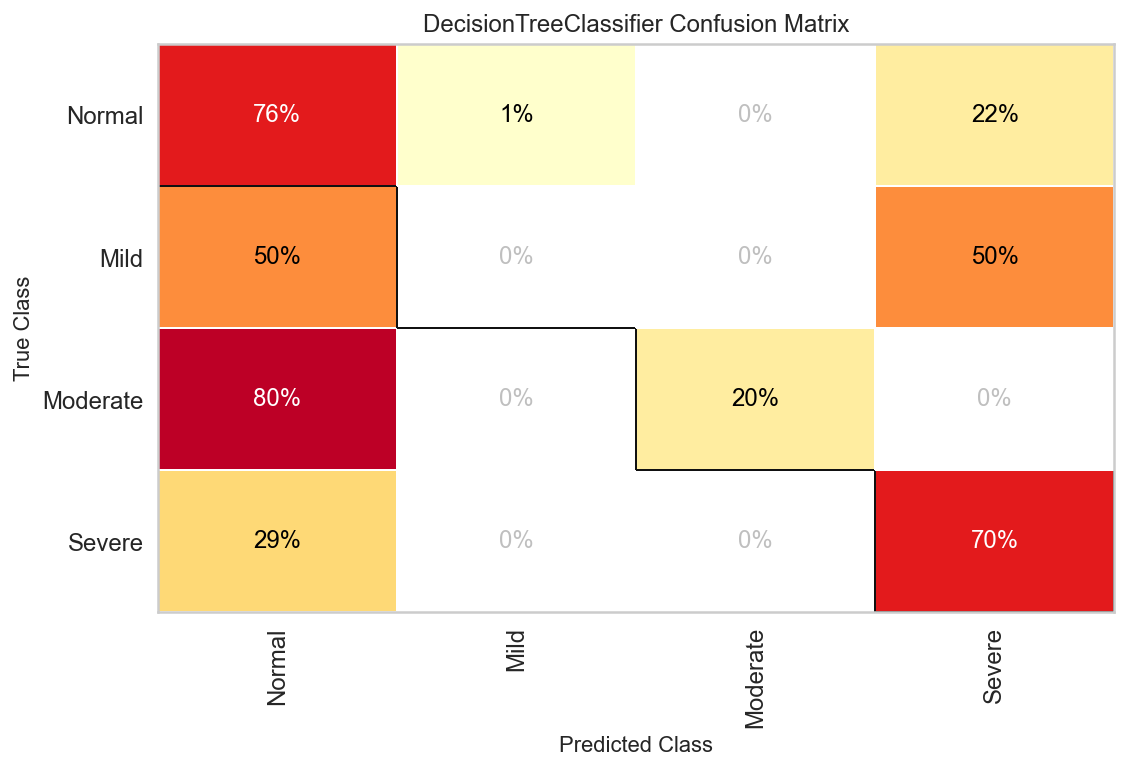

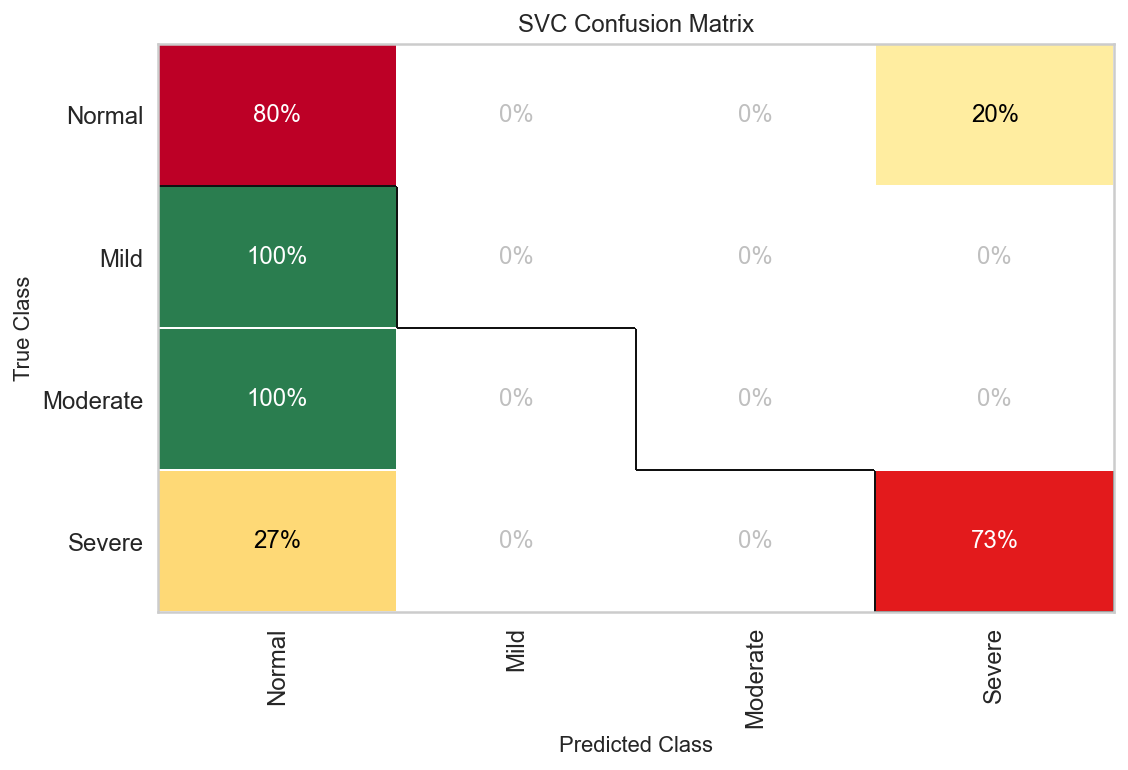

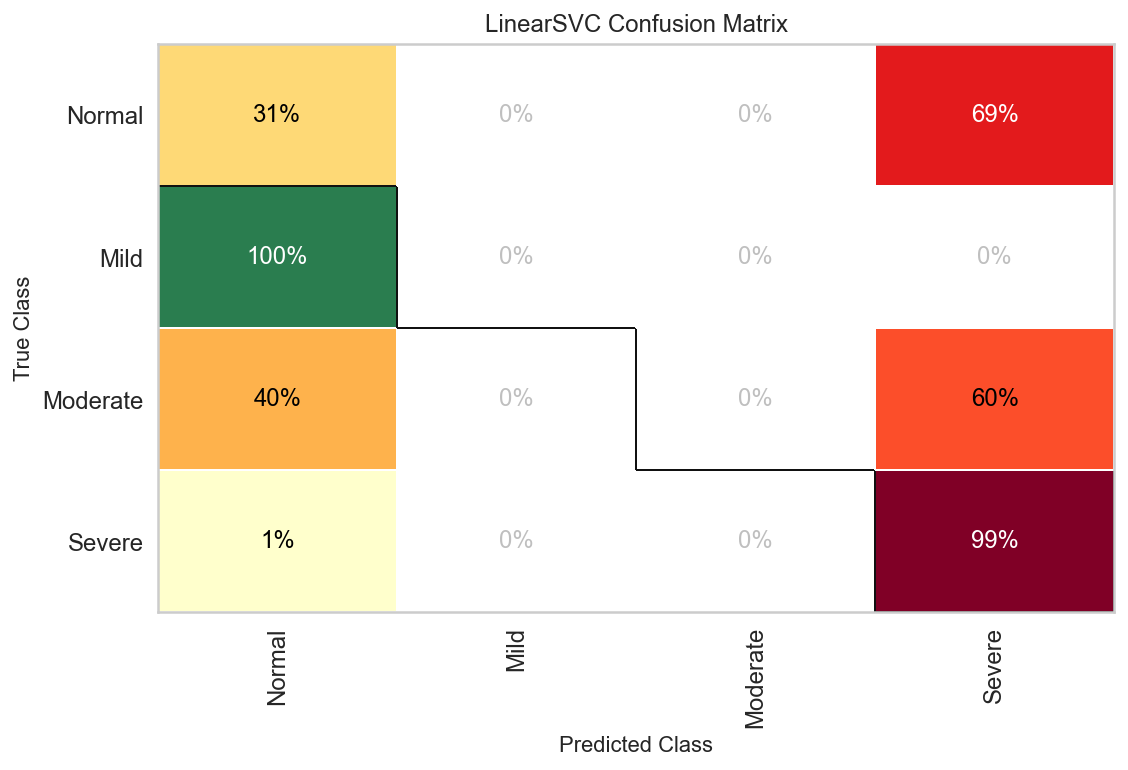

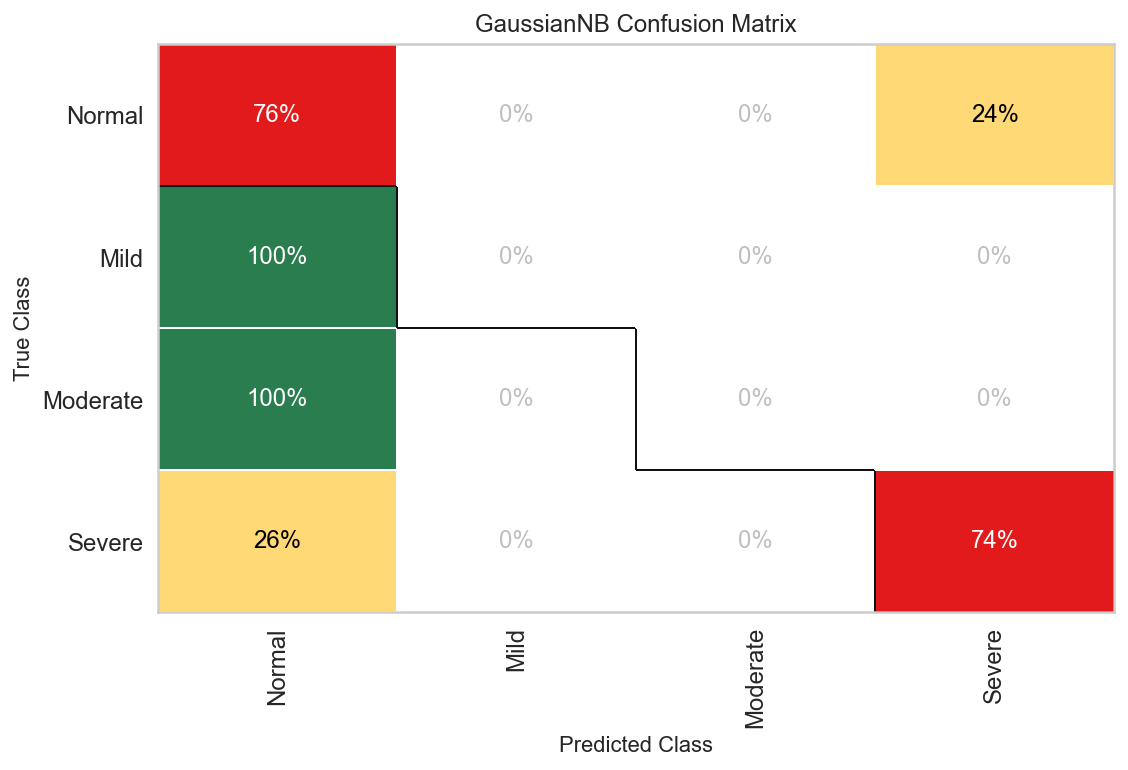

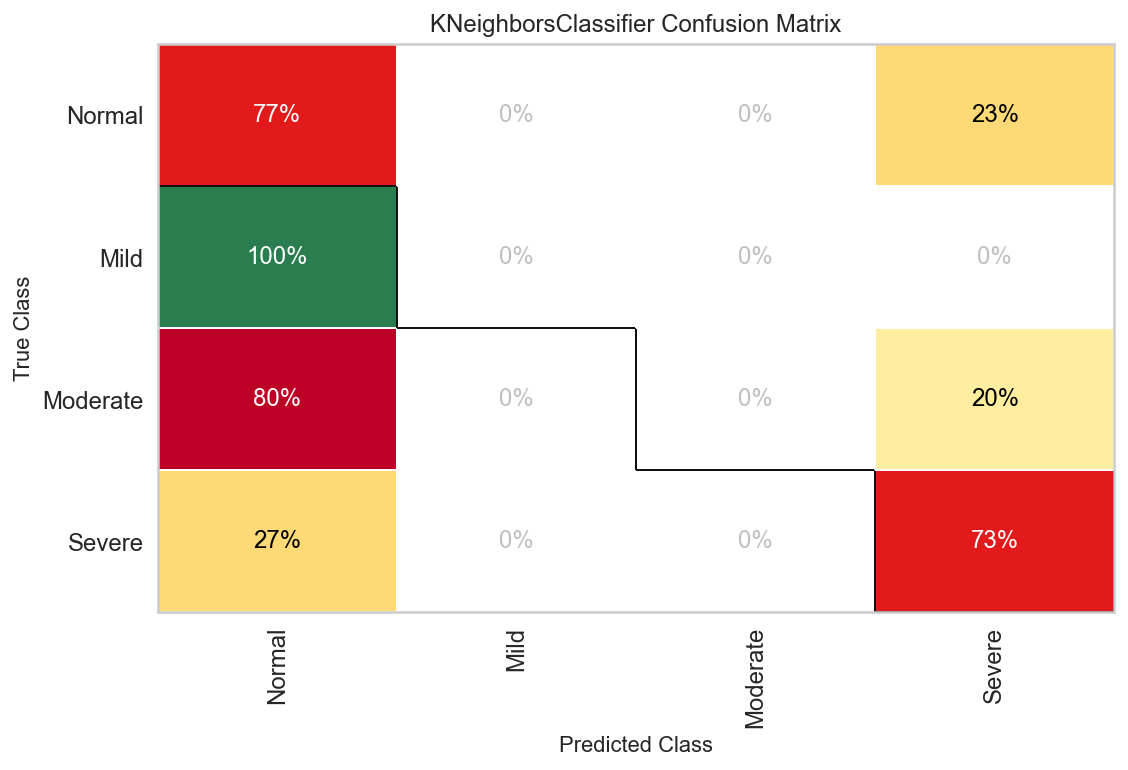

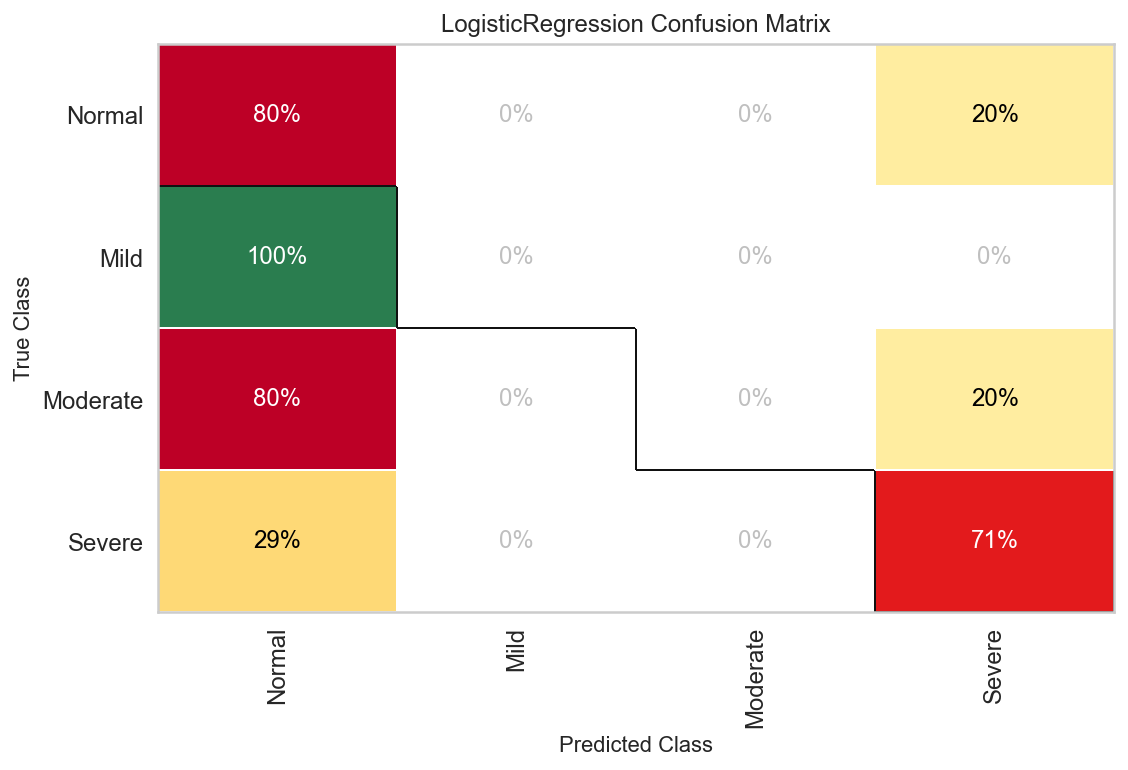

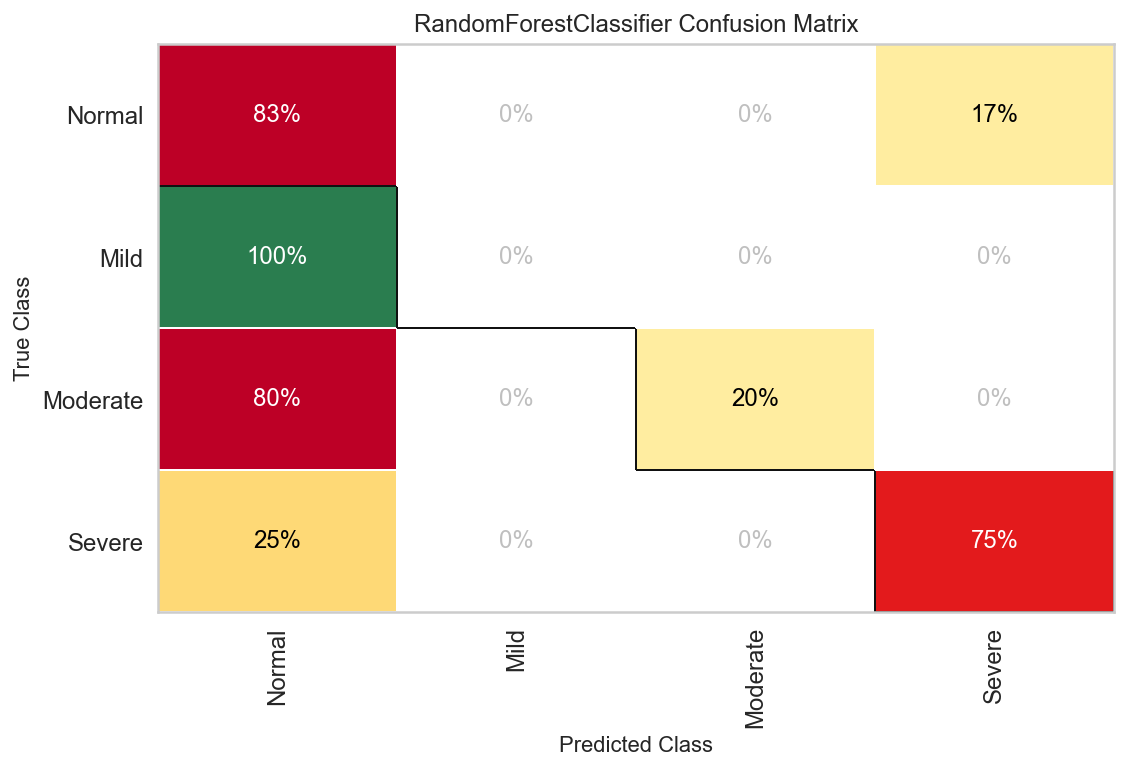

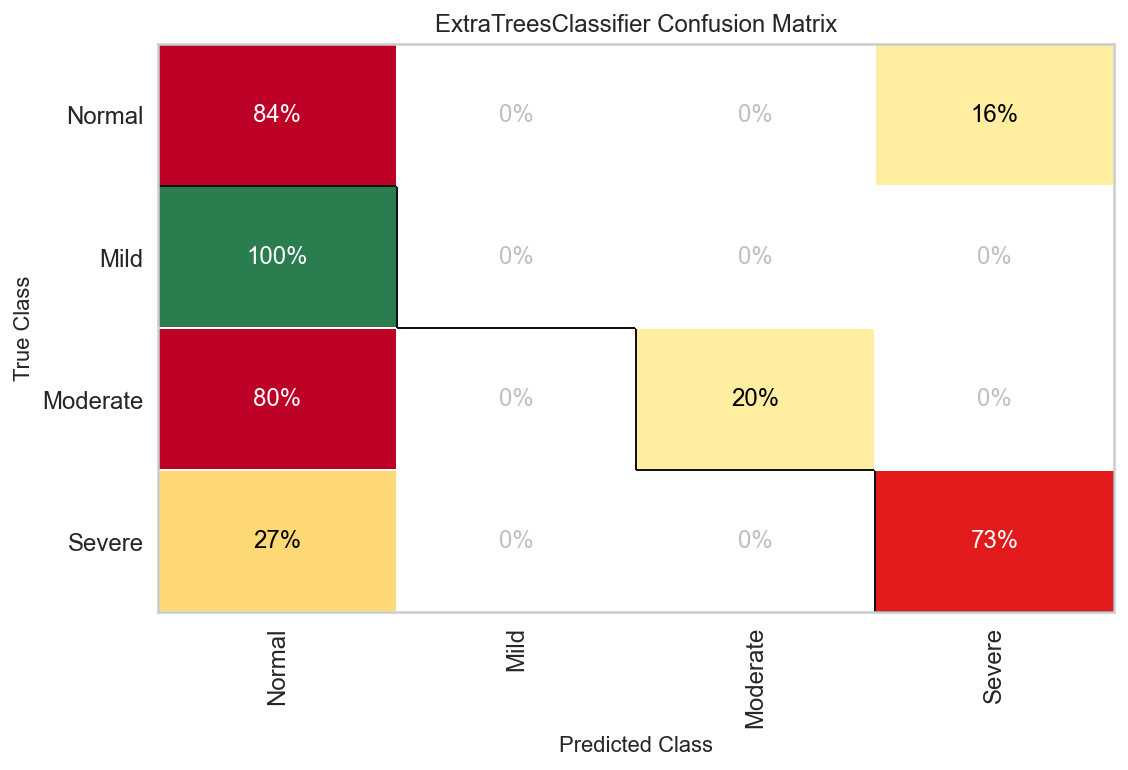

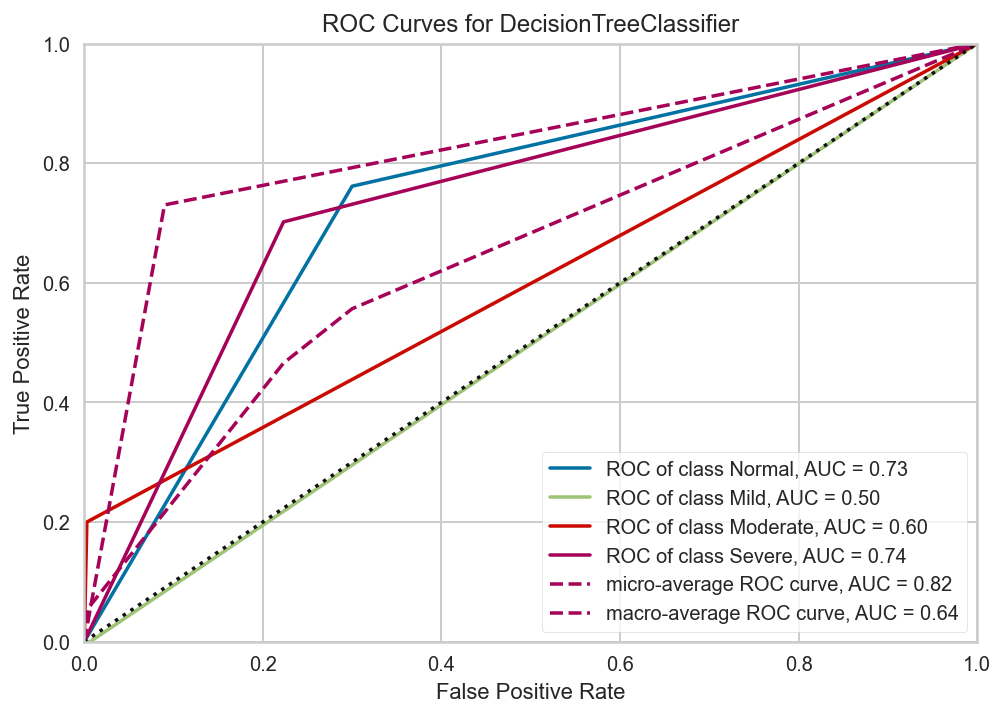

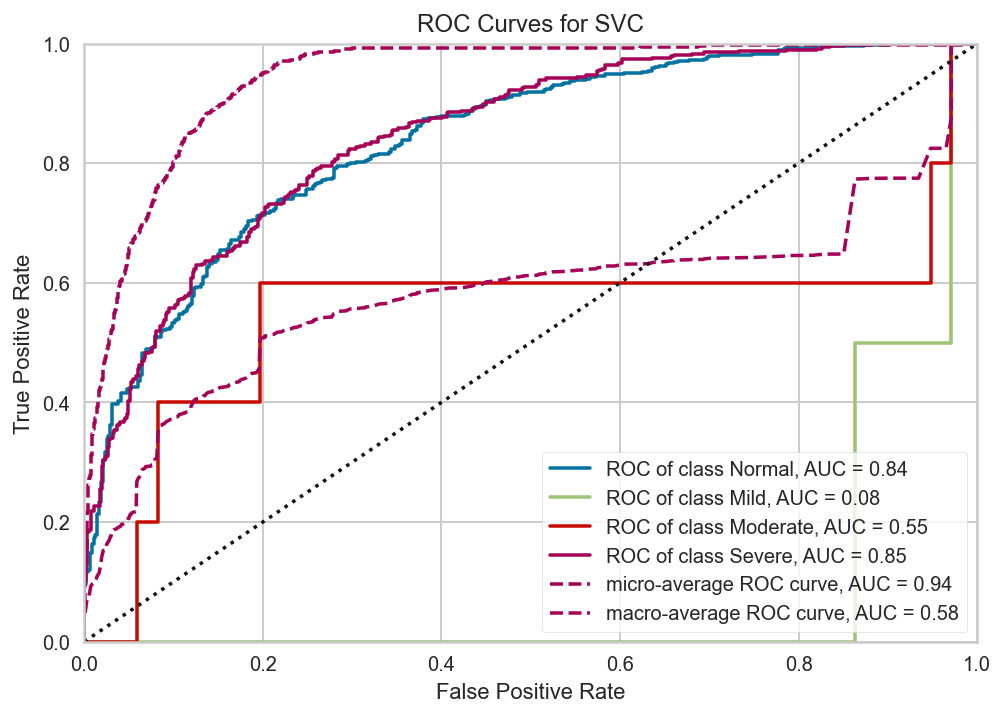

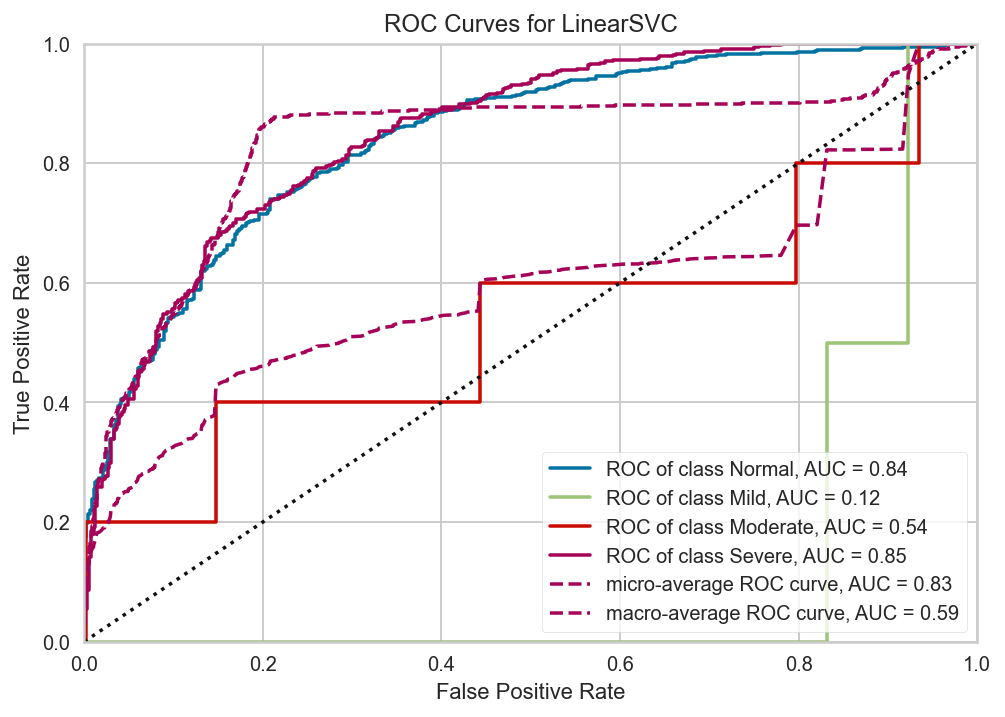

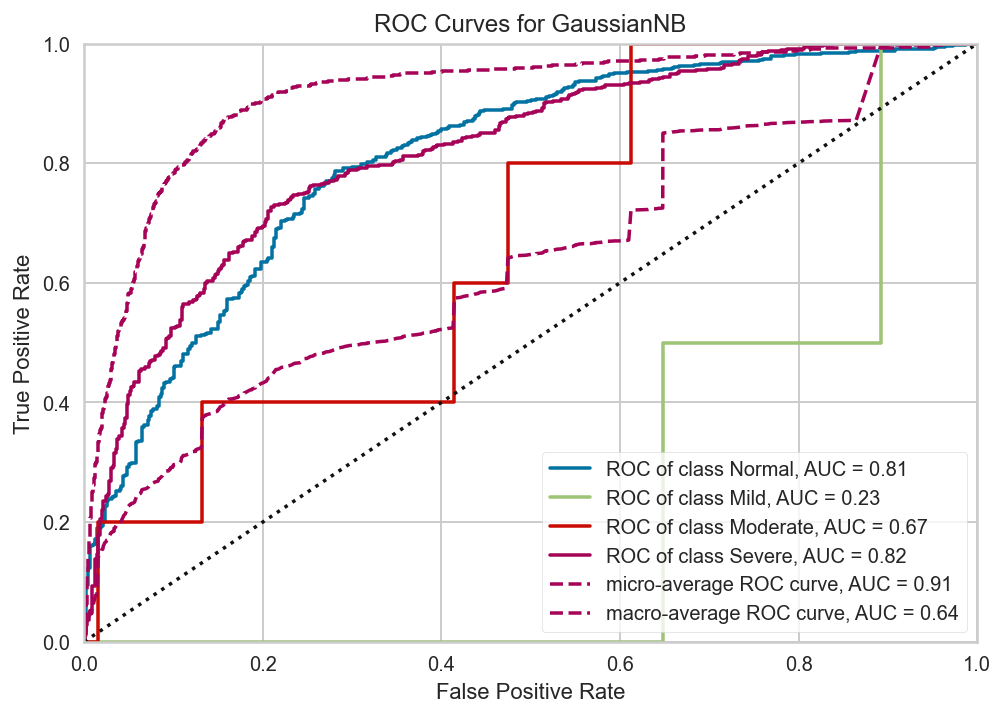

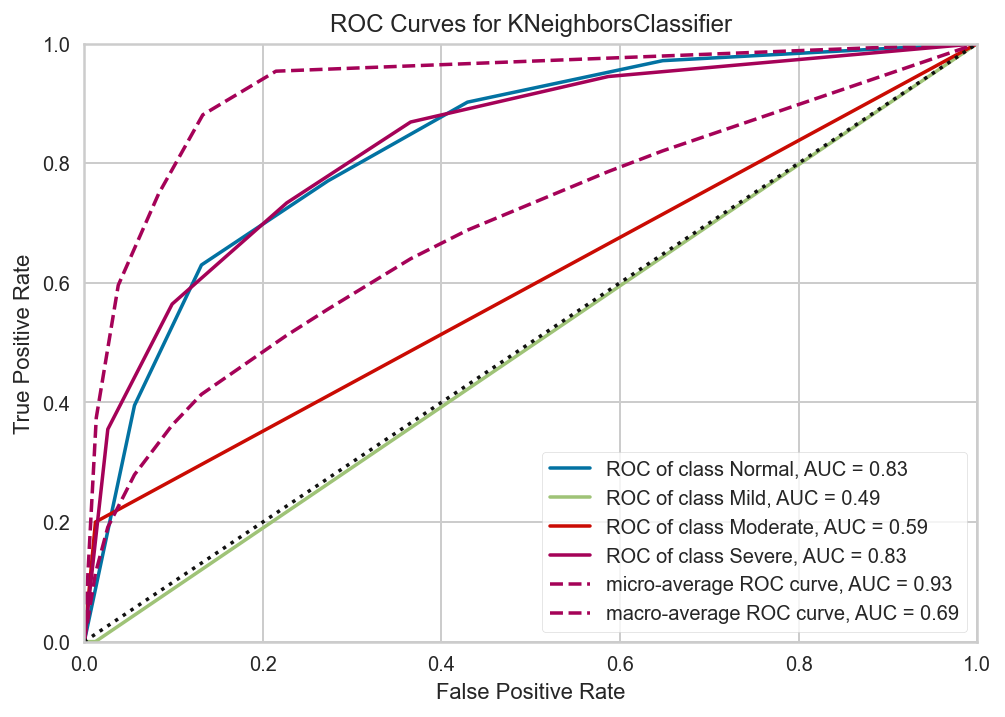

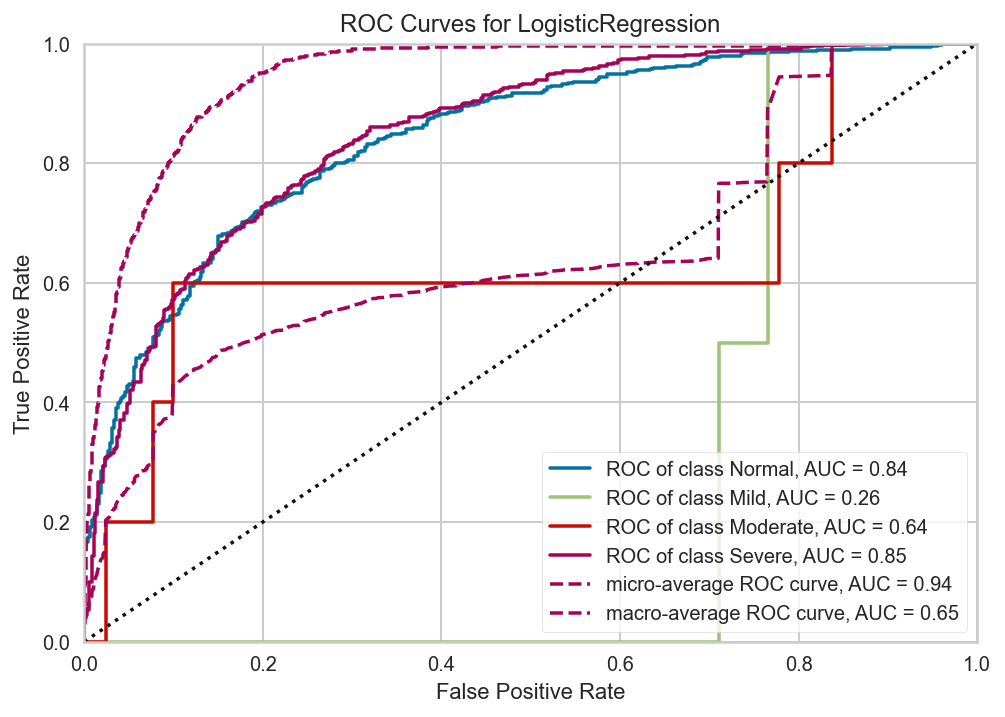

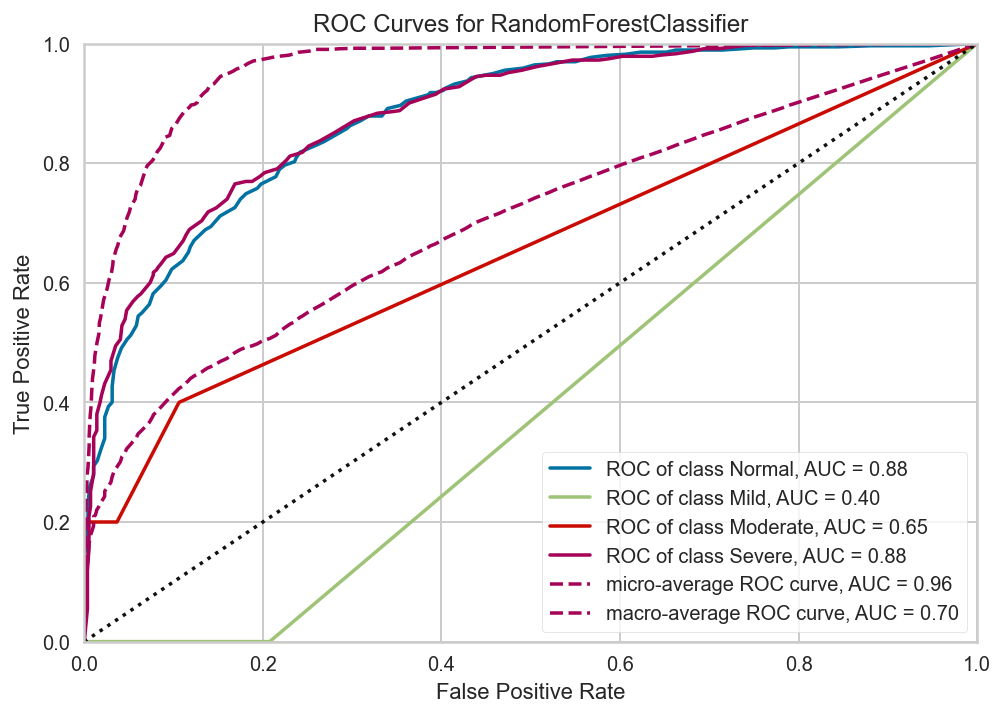

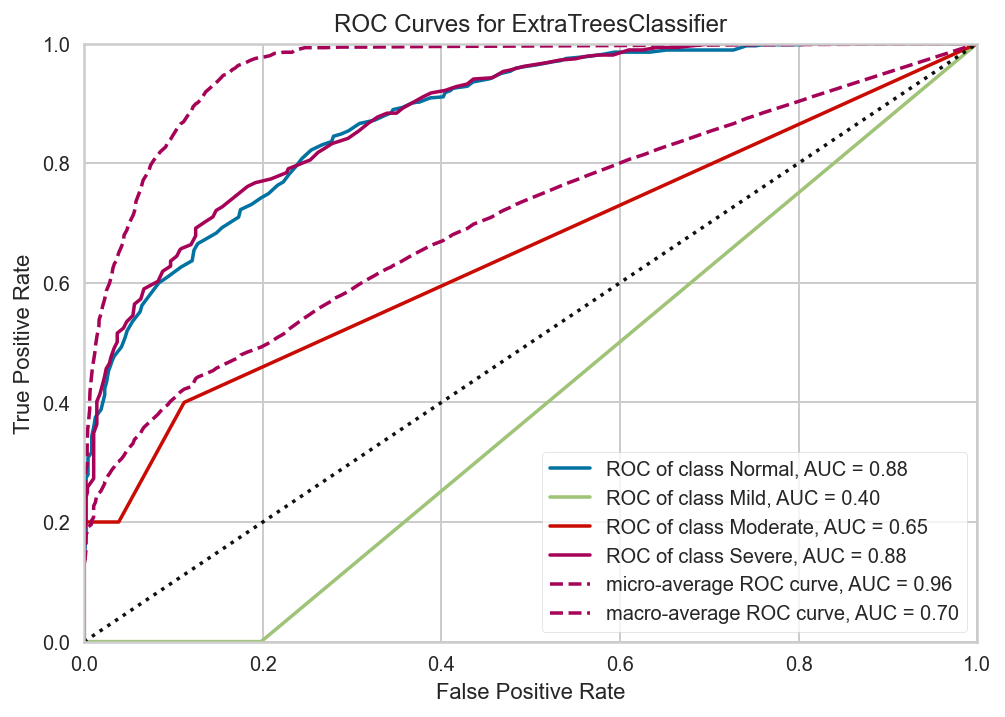

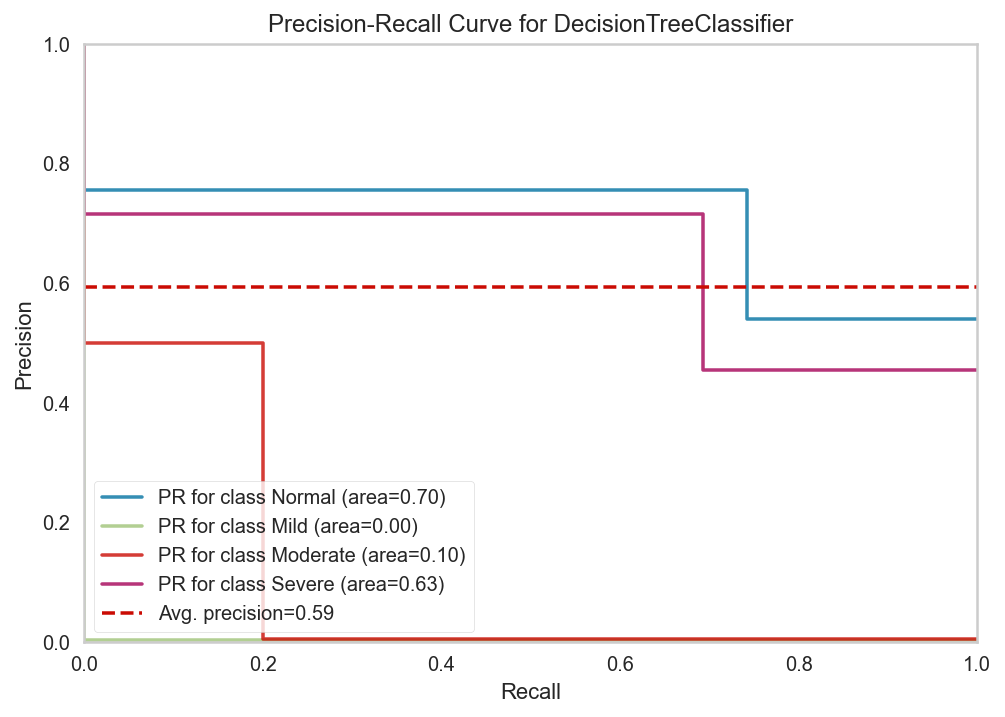

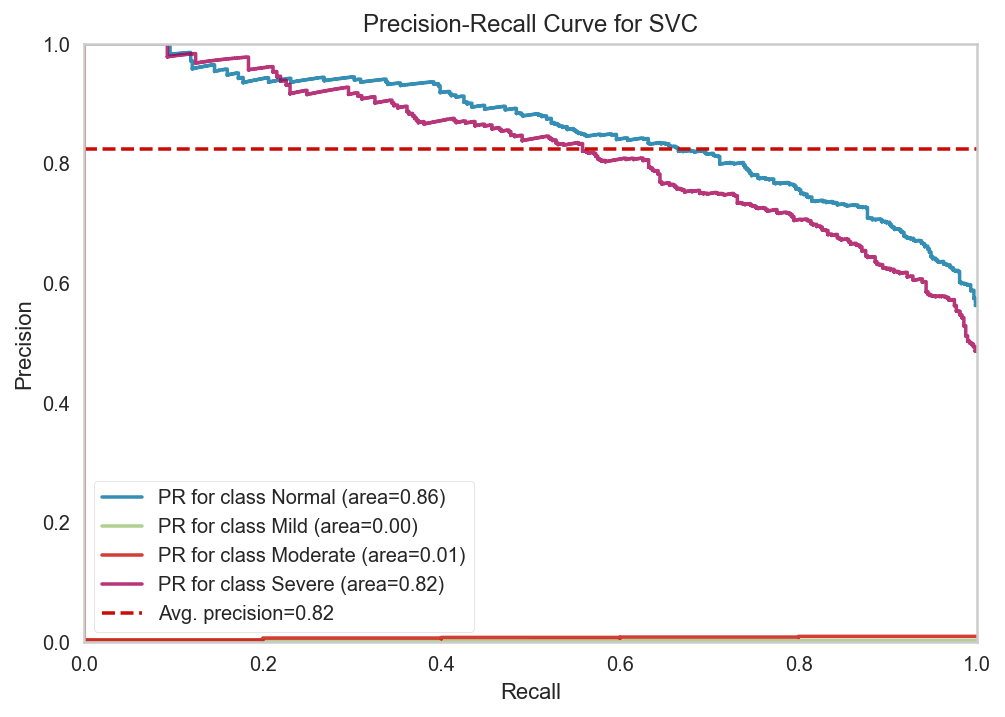

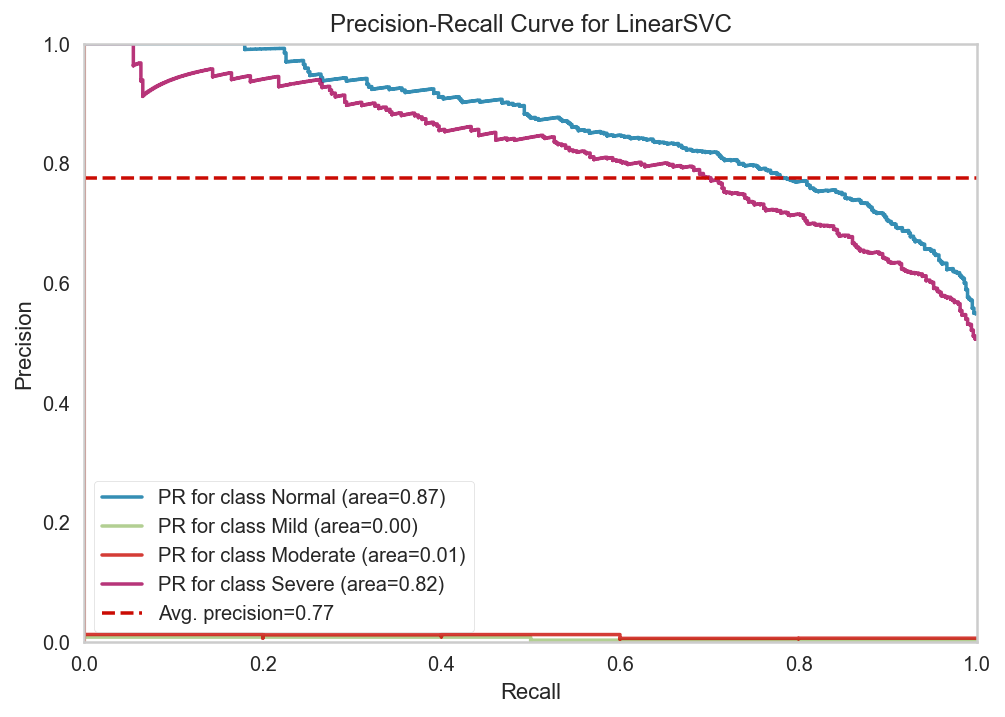

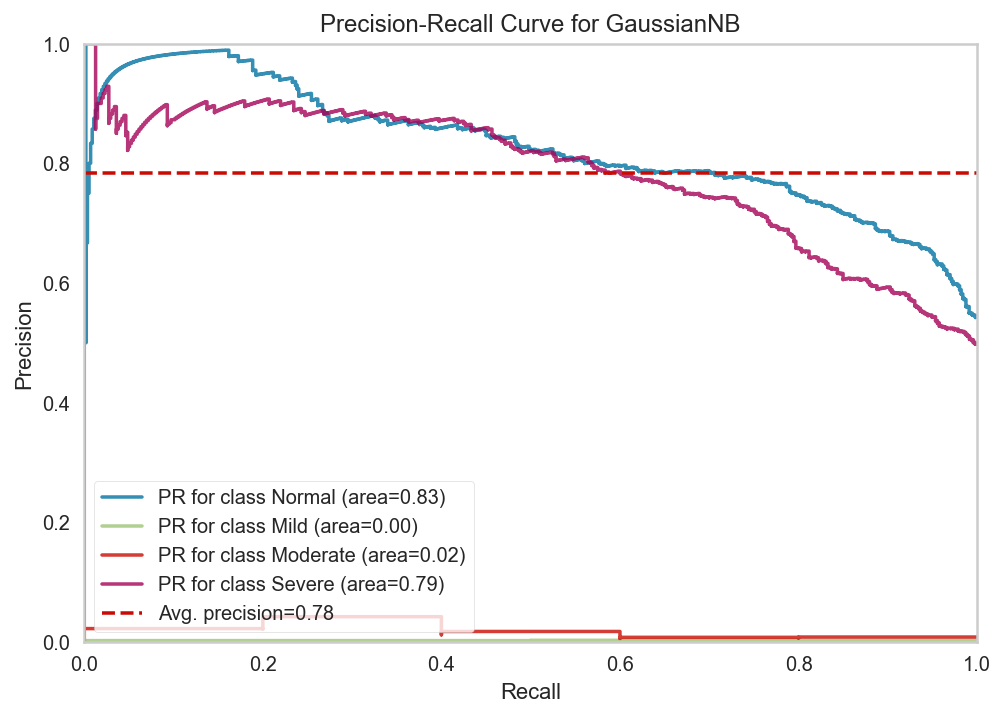

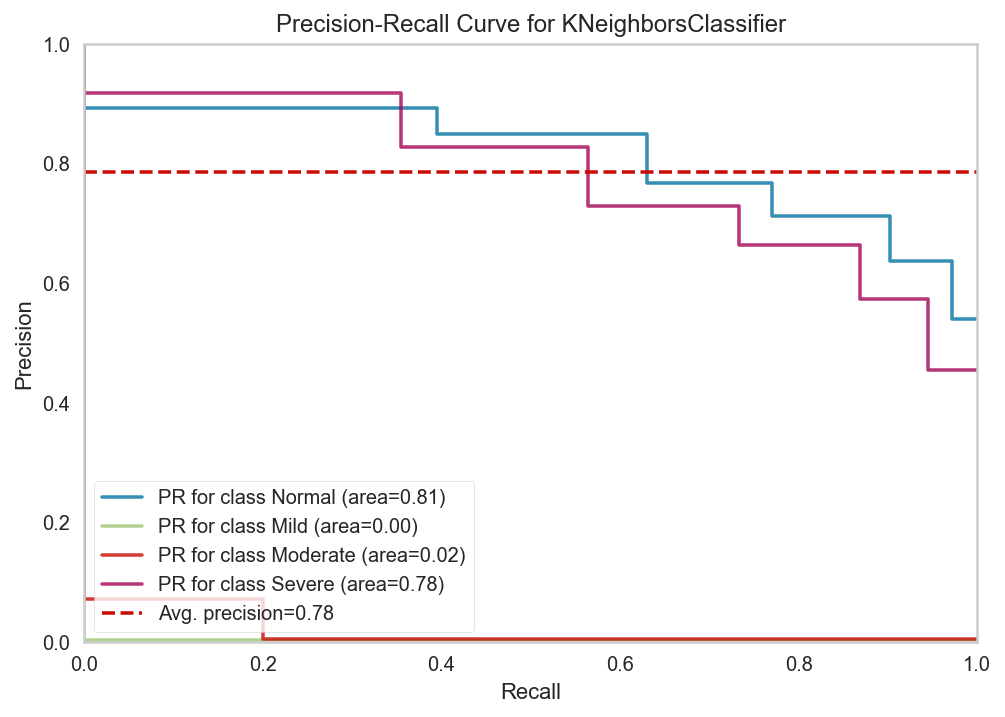

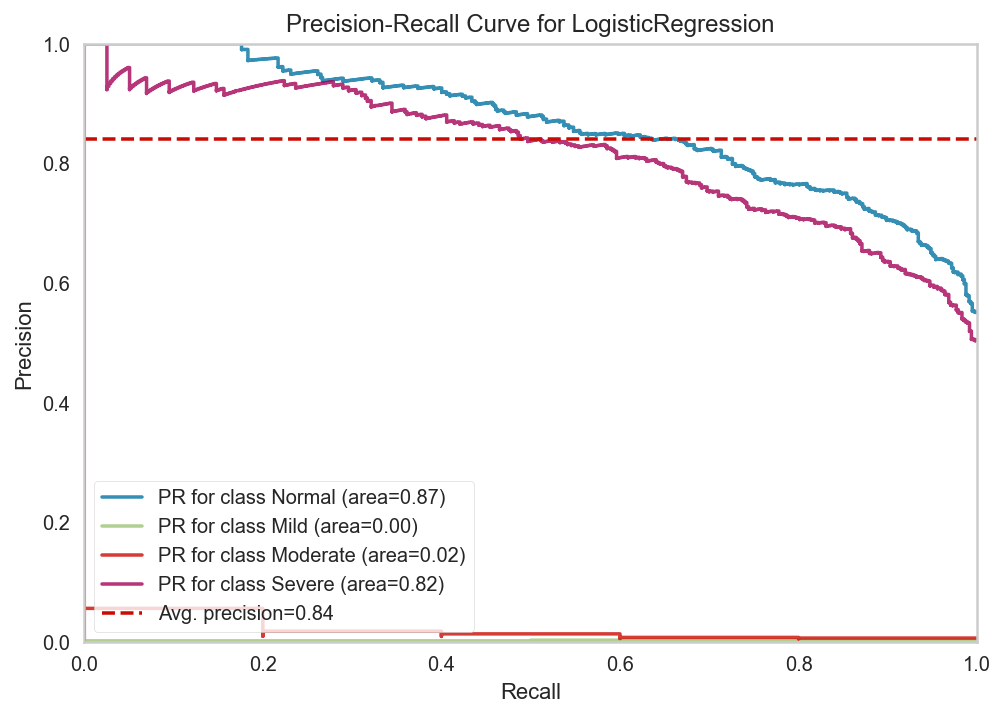

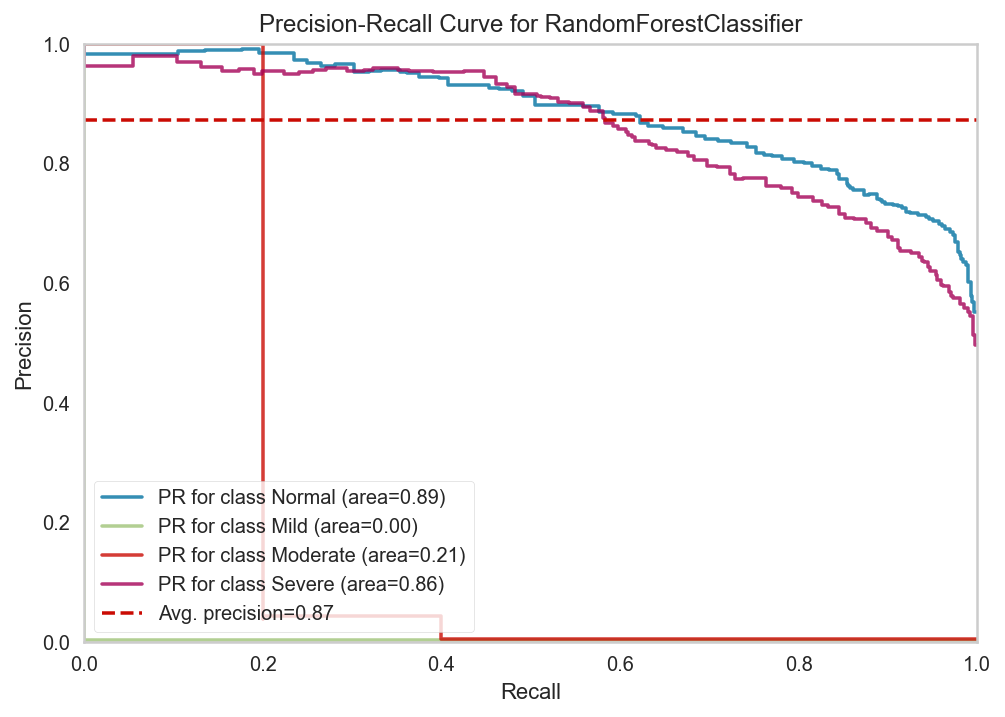

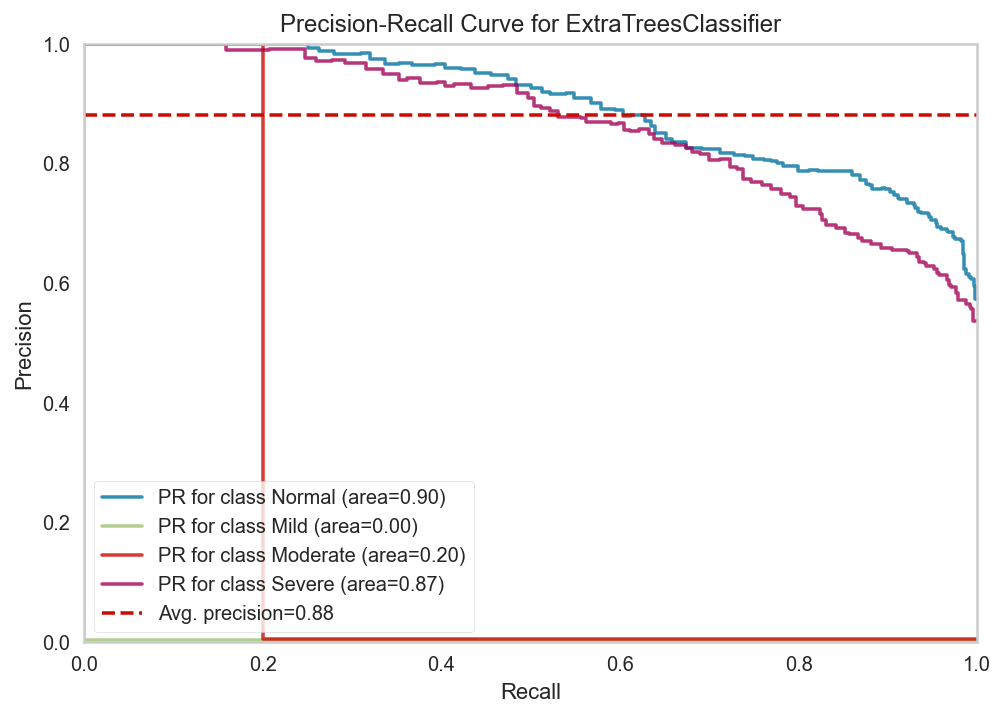

In [32]:
#deploy visualization
visualization =[CR_viz(),CPE_viz(),CM_viz(),ROC_viz(),PRC_viz()]

In [33]:
#Deploy aggregate metrics  
classifier_metrics()

DecisionTreeClassifier(random_state=0)
cohen_kappa_score: 0.465
log_loss: 9.314
zero_one_loss: 0.270
hemming_loss: 0.270
matthews_corrcoef: 0.465

------------------------------------------------------
SVC(random_state=0)
cohen_kappa_score: 0.517
log_loss: 0.000
zero_one_loss: 0.241
hemming_loss: 0.241
matthews_corrcoef: 0.517

------------------------------------------------------
LinearSVC(random_state=0)
cohen_kappa_score: 0.270
log_loss: 0.000
zero_one_loss: 0.388
hemming_loss: 0.388
matthews_corrcoef: 0.376

------------------------------------------------------
GaussianNB()
cohen_kappa_score: 0.496
log_loss: 1.093
zero_one_loss: 0.252
hemming_loss: 0.252
matthews_corrcoef: 0.496

------------------------------------------------------
KNeighborsClassifier()
cohen_kappa_score: 0.499
log_loss: 1.957
zero_one_loss: 0.250
hemming_loss: 0.250
matthews_corrcoef: 0.499

------------------------------------------------------
LogisticRegression(random_state=0)
cohen_kappa_score: 0.512
log_